In [4]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('transaction_dataset.csv')

# Inspect the dataset
print(data.info())  # View dataset structure
print(data.head())  # View first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

In [3]:
print(data.columns)


Index(['Index', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx'

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses              

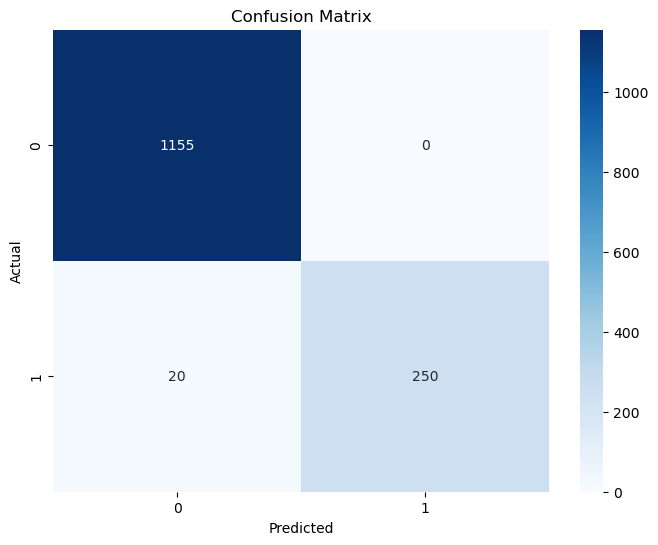

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\02ris\OneDrive\Desktop\Rishi_cv_project\ethereum_blockchain_project\transaction_dataset.csv")

# Inspect the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

# Drop missing values
data.dropna(inplace=True)

# Define features and target
y = data['FLAG']
X = data.drop(columns=['FLAG', 'Index'])

# Handle non-numeric columns
print("\nColumns with non-numeric data:")
print(X.select_dtypes(include=['object']).columns)

# Drop irrelevant non-numeric columns or encode them
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns
# If needed, encode non-numeric columns instead of dropping:
# for col in X.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nF1-Score:", f1_score(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
# Load the dataset
data = pd.read_csv(r"C:\Users\02ris\OneDrive\Desktop\Rishi_cv_project\ethereum_blockchain_project\transaction_dataset.csv")

# Drop missing values
data.dropna(inplace=True)

# Define target and features
y = data['FLAG']
X = data.drop(columns=['FLAG', 'Index'])  # Drop unrelated columns

# Handle non-numeric data
non_numeric_cols = X.select_dtypes(include=['object']).columns
if not non_numeric_cols.empty:
    print("Non-numeric columns detected:", non_numeric_cols)

    # Drop non-numeric columns (if irrelevant)
    X = X.select_dtypes(include=[np.number])

    # OR Encode non-numeric columns (if relevant)
    # from sklearn.preprocessing import LabelEncoder
    # for col in non_numeric_cols:
    #     le = LabelEncoder()
    #     X[col] = le.fit_transform(X[col])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nF1-Score:", f1_score(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Non-numeric columns detected: Index([' ERC20 most sent token type', ' ERC20_most_rec_token_type'], dtype='object')

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1155
           1       1.00      0.93      0.96       270

    accuracy                           0.99      1425
   macro avg       0.99      0.96      0.98      1425
weighted avg       0.99      0.99      0.99      1425


Confusion Matrix:
[[1155    0]
 [  20  250]]

F1-Score: 0.9615384615384616

AUC-ROC Score: 0.9990941157607824


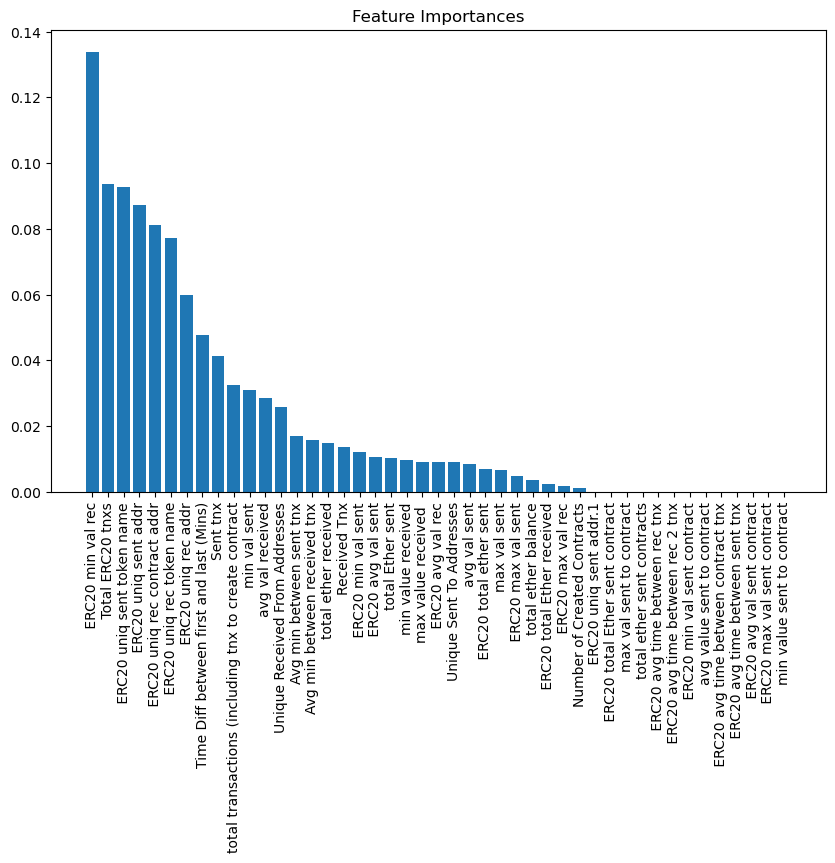

In [8]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()


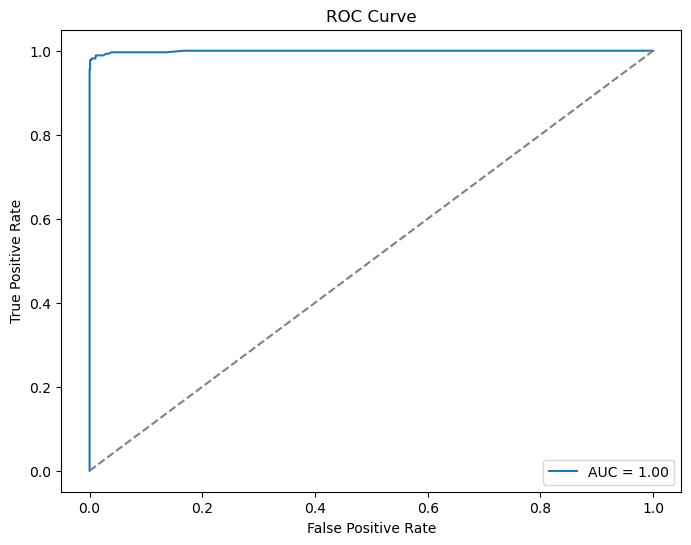

In [9]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for positive class
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [10]:
import joblib

# Save the model
joblib.dump(rf, "random_forest_model.pkl")
print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


In [11]:
# Save predictions
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.to_csv("model_predictions.csv", index=False)
print("Predictions saved to model_predictions.csv")

# Save evaluation metrics
metrics = {
    "F1-Score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
}
pd.DataFrame(metrics, index=[0]).to_csv("evaluation_metrics.csv", index=False)
print("Evaluation metrics saved to evaluation_metrics.csv")


Predictions saved to model_predictions.csv
Evaluation metrics saved to evaluation_metrics.csv


In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring="f1", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1155
           1       1.00      0.93      0.96       270

    accuracy                           0.99      1425
   macro avg       0.99      0.96      0.98      1425
weighted avg       0.99      0.99      0.99      1425

